# IMPORT LIBRARIES

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.style
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')

<Figure size 864x432 with 0 Axes>

# UNDERSTANDING DATA

This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [2]:
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

Definitions Taken from 2019 OSMI Survey:

For the purposes of this survey:
- A mental health disorder is defined as a mental illness that has been diagnosed by a doctor.
- A mental health issue is defined as a potential mental illness, which may or may not have been diagnosed by a doctor.

Additional Definitions:
- Mental disorder is defined by 'treatment'
- Mental issues is defined by 'mental_issues'
- Tech workspace is defined by 'tech_company'

In [4]:
survey['mental_issues'] = np.where((survey['work_interfere'] == 'Often') | (survey['work_interfere'] == 'Sometimes') | (survey['treatment'] == 'Yes'), 'Yes', 'No') #| survey['treatment'] == 'Yes'
survey['region'] = np.where(survey['Country'] == 'United States', 'US', 'International')
survey.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,mental_issues,region
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Yes,US
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,No,US
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,No,International
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Yes,International
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,No,US
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,Yes,US
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Some of them,No,No,No,Don't know,No,NaN,Yes,US
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,No,No,No,No,No,No,No,NaN,No,International
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,No,Yes,Yes,No,Maybe,No,No,NaN,Yes,US
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,No,International


In [5]:
survey.shape
#survey.dtypes
#survey['Age'].quantile(0.005)

(1259, 29)

In [6]:
s = survey[(survey['tech_company'] == 'No') & (survey['comments'] != None)][['tech_company','comments','treatment']]
s.sort_values(['comments'])

c = [x for x in s['comments']]

# QUESTIONS

- Difference in perception of mental health vs physical health in the workplace?
- How does perception of mental health differ by country?
- Does mental health differ by company size? Age? Gender?
- Relationship between seeking treatment and knowing company benefits / programs?

# DATAFRAMES

In [101]:
tech = survey[survey['tech_company'] == 'Yes']
disorder = survey[survey['treatment'] == 'Yes']
issues = survey[survey['mental_issues'] == 'Yes']
us = survey[survey['region'] == 'US']
intl = tech[tech['region'] != 'US']
age = survey.sort_values('Age')

# DEMOGRAPHICES OF DATA SET

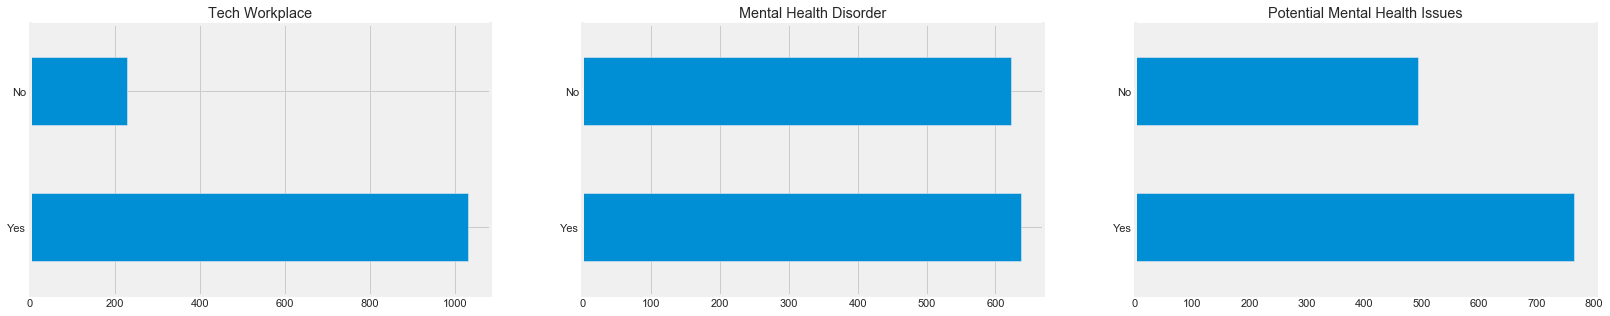

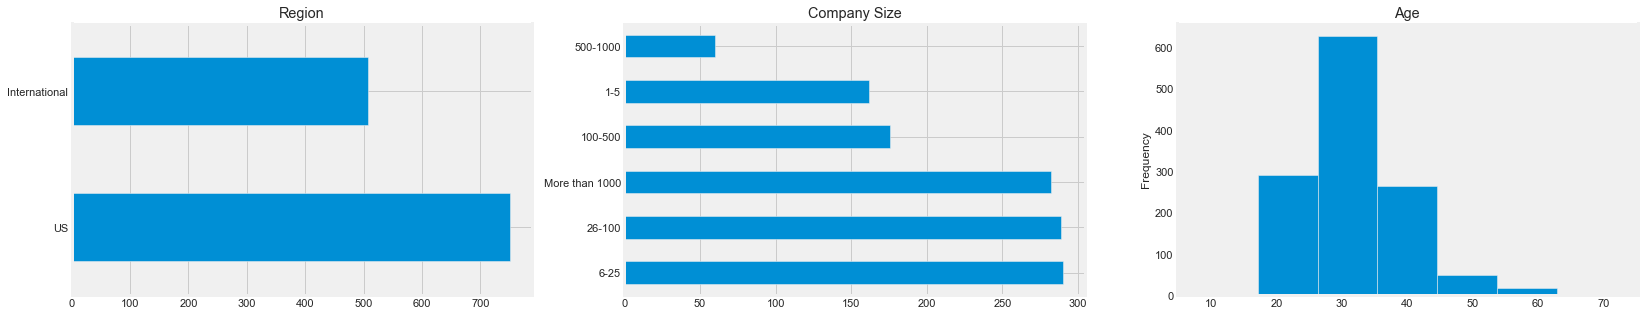

<Figure size 432x288 with 0 Axes>

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,5))
                
survey['tech_company'].value_counts().plot.barh(ax=ax1, title="Tech Workplace")
survey['treatment'].value_counts().plot.barh(ax=ax2, title="Mental Health Disorder")
survey['mental_issues'].value_counts().plot.barh(ax=ax3, title="Potential Mental Health Issues")
plt.grid(b=None)
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,5))
survey['region'].value_counts().plot.barh(ax=ax1, title="Region")
survey['no_employees'].value_counts().plot.barh(ax=ax2, title="Company Size")
age['Age'][4:1257].plot.hist(bins = 7, ax=ax3, title="Age")
plt.grid(b=None)
plt.show()

plt.savefig('test.png', bbox_inches = 'tight', transparent = True)


In [9]:
survey['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [10]:
ax = survey['no_employees'].value_counts().plot.barh(ax=ax2, title="Company Size")
#ax.invert_yaxis()
ax.tick_params()
ax.grid(False)

plt.savefig('age.png', bbox_inches = 'tight', transparent = True)

<Figure size 432x288 with 0 Axes>

# GEO ANALYSIS

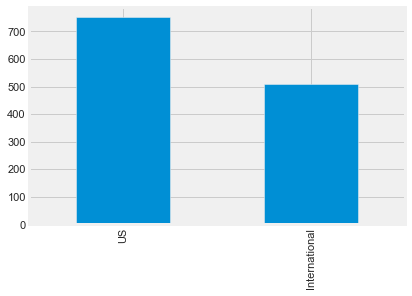

In [11]:
survey['region'].value_counts().plot.bar()

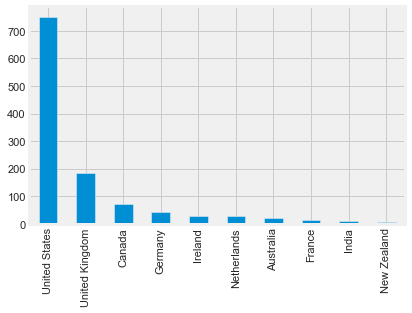

In [12]:
survey['Country'].value_counts()[:10].plot.bar()

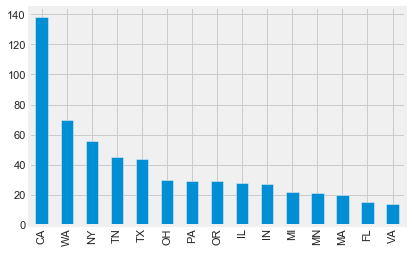

In [13]:
us['state'].value_counts()[:15].plot.bar()

In [14]:
survey.groupby(['region'])['treatment'].value_counts().sort_values(ascending = False)

region         treatment
US             Yes          410
               No           341
International  No           281
               Yes          227
Name: treatment, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

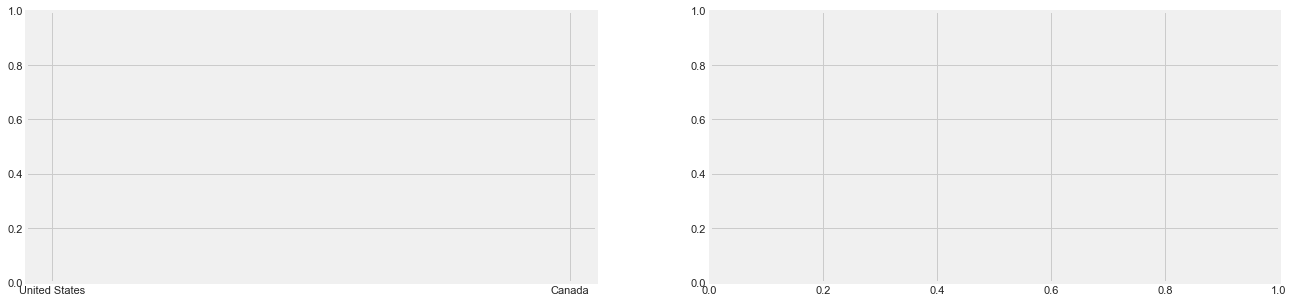

In [15]:
fig, axs = plt.subplots(1,2, figsize = (20, 5))

axs[0].bar(survey['Country'], (survey['Country'].value_counts()))
axs[1].hist(survey['Age'], bins = 10)

plt.show()

# COMPANY SIZE

Findings:
- Whether employee has a mental health issue or not is not really dependant on company size. It may also be that the survey was more likely completed by those with mental issues rather than those without.
- If you do have a mental health issue, you may be better off working at a larger company since a larger proportion of those do provide benefits compared to smaller companies.
- Larger proportion of people in smaller companies are willing to talk about their mental health with coworkers and supervisors.

In [59]:
tech_issues = tech[tech['mental_issues'] == 'Yes']
tech_issues['mental_issues'].unique()

array(['Yes'], dtype=object)

### Variable with 2 values

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


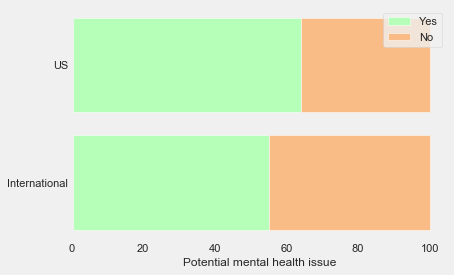

In [143]:
xvar = 'region'
yvar = 'mental_issues'
df = tech

size = df[[xvar, yvar]]
size['count'] = 1
size = size.pivot_table(values = ['count'], index = [xvar], columns = [yvar], aggfunc = np.sum)
size.columns = size.columns.get_level_values(1)
#reorder = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
#size = size.reindex(reorder)

r = [0,1]
#r = [0,1,2,3,4,5]

totals = [i+j for i,j in zip(size['Yes'], size['No'])]
greenBars = [i / j * 100 for i,j in zip(size['Yes'], totals)]
orangeBars = [i / j * 100 for i,j in zip(size['No'], totals)]

plt.barh(r, greenBars, color='#b5ffb9', edgecolor='white')#, width=barWidth)
plt.barh(r, orangeBars, left=greenBars, color='#f9bc86', edgecolor='white')#, width=barWidth)

plt.yticks(r, size.index)
plt.rcParams.update({'font.size': 10})
#plt.ylabel("Number of Employees")
plt.xlabel('Potential mental health issue')
plt.legend(size.columns[::-1])
plt.grid(False)

plt.savefig('test', bbox_inches = 'tight', transparent = True) 
plt.show()


In [69]:
size.columns

Index(['No', 'Yes'], dtype='object', name='treatment')

In [140]:
tech['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

### Variable with 3 values

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


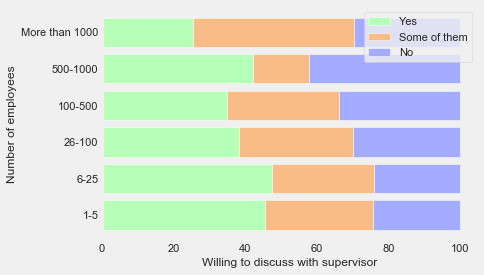

In [141]:
yvar = 'supervisor'
xvar = 'no_employees'
df = tech_issues
var3 = "Some of them"

size = df[[xvar, yvar]]
size['count'] = 1
size = size.pivot_table(values = ['count'], index = [xvar], columns = [yvar], aggfunc = np.sum)
size.columns = size.columns.get_level_values(1)
#size.sort_values(['count'], ascending = False)[:5]
reorder = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
size = size.reindex(reorder)

#r = [0,1,2,3,4]
r = [0,1,2,3,4,5]

totals = [i+j+k for i,j,k in zip(size['Yes'], size['No'], size[var3])]
greenBars = [i / j * 100 for i,j in zip(size['Yes'], totals)]
orangeBars = [i / j * 100 for i,j in zip(size['No'], totals)]
blueBars = [i / j * 100 for i,j in zip(size[var3], totals)]


plt.barh(r, greenBars, color='#b5ffb9', edgecolor='white')#, width=barWidth)
plt.barh(r, orangeBars, left=greenBars, color='#f9bc86', edgecolor='white')#, width=barWidth)
plt.barh(r, blueBars, left=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white')
plt.yticks(r, size.index)
plt.ylabel("Number of employees")
plt.xlabel('Willing to discuss with supervisor')
plt.legend(size.columns[::-1])
plt.rcParams.update({'font.size': 10})
plt.grid(False)
 
plt.savefig('test.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [20]:
size.columns

Index(['Don't know', 'No', 'Yes'], dtype='object', name='wellness_program')

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


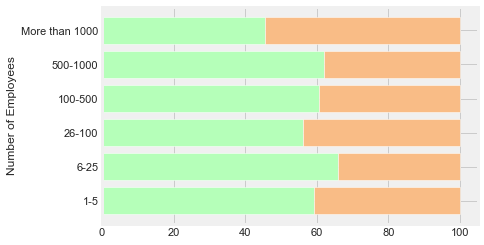

In [21]:
size = tech[['no_employees', 'supervisor']]
size['count'] = 1
size = size.pivot_table(values = ['count'], index = ['no_employees'], columns = ['supervisor'], aggfunc = np.sum)
size.columns = size.columns.get_level_values(1)
reorder = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
size = size.reindex(reorder)

r = [0,1,2,3,4,5]

totals = [i+j for i,j in zip(size['Yes'], size['No'])]
greenBars = [i / j * 100 for i,j in zip(size['Yes'], totals)]
orangeBars = [i / j * 100 for i,j in zip(size['No'], totals)]

plt.barh(r, greenBars, color='#b5ffb9', edgecolor='white')#, width=barWidth)
plt.barh(r, orangeBars, left=greenBars, color='#f9bc86', edgecolor='white')#, width=barWidth)

plt.yticks(r, size.index)
plt.ylabel("Number of Employees")
 
plt.show()

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


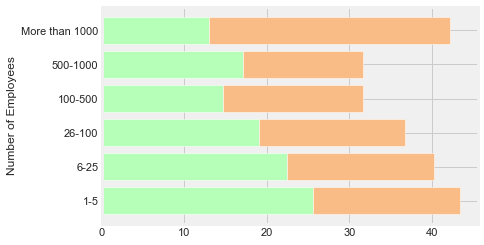

In [22]:
size = tech[['no_employees', 'coworkers']]
size['count'] = 1
size = size.pivot_table(values = ['count'], index = ['no_employees'], columns = ['coworkers'], aggfunc = np.sum)
size.columns = size.columns.get_level_values(1)
reorder = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
size = size.reindex(reorder)

r = [0,1,2,3,4,5]

totals = [i+j+k for i,j,k in zip(size['Yes'], size['No'], size["Some of them"])]
greenBars = [i / j * 100 for i,j in zip(size['Yes'], totals)]
orangeBars = [i / j * 100 for i,j in zip(size['No'], totals)]
blueBars = [i / j * 100 for i,j in zip(size["Some of them"], totals)]


plt.barh(r, greenBars, color='#b5ffb9', edgecolor='white')#, width=barWidth)
plt.barh(r, orangeBars, left=greenBars, color='#f9bc86', edgecolor='white')#, width=barWidth)
plt.yticks(r, size.index)
plt.ylabel("Number of Employees")
 
plt.show()

In [23]:
survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'mental_issues',
       'region'],
      dtype='object')

# MENTAL vs. PHYSICAL

 - mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

 - phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

 - mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

 - phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

 - mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

 - obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

ANALYSIS
- High correlation (87%) between thinking there is a negative consequence talking about both mental and physical health and those who have heard negative outcomes from mental health in the workplace
- High correlatin between thinking they can discuss mental health issues and discussing physical health issues.

In [110]:
ment_phys = tech[['mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical','obs_consequence']]
ment_phys2 = ment_phys.applymap(lambda x: 2 if x == 'Yes' else 0 if x == 'No' else 1)
ment_phys2.head()

,mental_health_consequence,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,0,0,1,2,0
2,0,0,2,2,0,0
3,2,2,1,1,0,2
4,0,0,2,2,1,0
5,0,0,0,1,1,0


In [33]:
for x in ment_phys.columns:
    print(ment_phys[x].unique())

['No' 'Yes' 'Maybe']
['No' 'Yes' 'Maybe']
['No' 'Yes' 'Maybe']
['Maybe' 'Yes' 'No']
['Yes' 'No' "Don't know"]
['No' 'Yes']


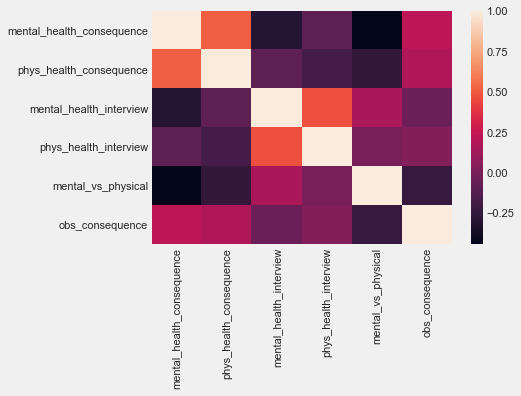

In [109]:
corr = ment_phys2.corr()
sns.heatmap(corr)

plt.savefig('ment_phys.png', bbox_inches = 'tight', transparent = True)

In [122]:
ment_phys2['phys_health_consequence'].corr(ment_phys2['obs_consequence'])

0.18710586215060251